In [ ]:
import numpy as np

# Dados de exemplo
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 2.5, 3, 4, 4.5])

# Cálculo das médias
x_mean = np.mean(x)
y_mean = np.mean(y)

# Cálculo do coeficiente angular (Beta 1)
numerador = np.sum((x - x_mean) * (y - y_mean))
denominador = np.sum((x - x_mean) ** 2)
beta_1 = numerador / denominador

# Cálculo do intercepto (Beta 0)
beta_0 = y_mean - beta_1 * x_mean

print(f"Coeficiente Angular (Beta 1): {beta_1:.4f}")
print(f"Intercepto (Beta 0): {beta_0:.4f}")

Coeficiente Angular (Beta 1): 0.6500
Intercepto (Beta 0): 1.2500


In [ ]:
import numpy as np

# Dados de exemplo
x = np.array([1, 2, 3, 4, 5])
y_real = np.array([2, 2.5, 3, 4, 4.5])

# Coeficientes da regressão
beta_0 = 1.25
beta_1 = 0.65

# Previsões do modelo
y_pred = beta_0 + beta_1 * x

# Cálculo do SS_res (Soma dos Quadrados dos Resíduos)
ss_res = np.sum((y_real - y_pred) ** 2)

# Cálculo do SS_tot (Soma dos Quadrados Totais)
y_mean = np.mean(y_real)
ss_tot = np.sum((y_real - y_mean) ** 2)

# Cálculo do R²
r2 = 1 - (ss_res / ss_tot)

print(f"Erro Quadrático Médio (MSE): {ss_res / len(y_real):.4f}")
print(f"Erro Médio Absoluto (MAE): {np.mean(np.abs(y_real - y_pred)):.4f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

Erro Quadrático Médio (MSE): 0.0150
Erro Médio Absoluto (MAE): 0.1000
Coeficiente de Determinação (R²): 0.9826


Shapiro-Wilk Test: W=0.9635780674037284, p-value=0.8326528205591632
Breusch-Pagan Test: LM=-1.1102230246251565e-15, p-value=1.0
Durbin-Watson Test: 2.533333333333333
Breusch-Pagan Test:
LM Statistic: -0.0000
P-Value: 1.0000


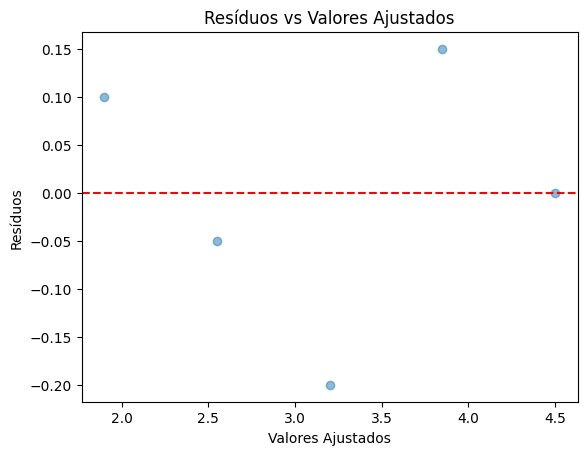

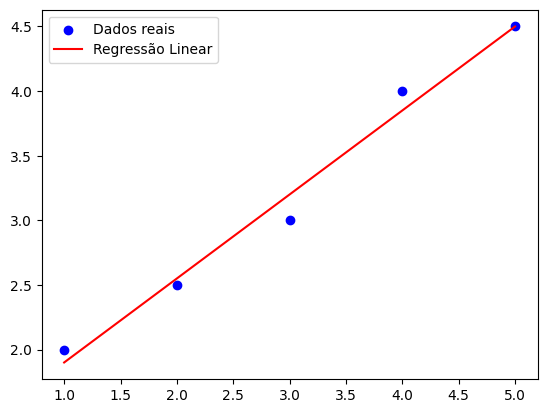

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# Dados de exemplo
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 2.5, 3, 4, 4.5])

# Criando o modelo
model = LinearRegression()
model.fit(X, y)

# Predição
y_pred = model.predict(X)

residual = (y - y_pred)

# Normalidade dos Resíduos
shapiro_test = stats.shapiro(residual)

# Para resíduos normais, devem apresentar  p-value > 0.05
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

# Homoscedasticidade - Teste de homogeneidade de variâncias p-value > 0.05

X_const = sm.add_constant(X)
bp_test = het_breuschpagan(residual, X_const)

print(f"Breusch-Pagan Test: LM={bp_test[0]}, p-value={bp_test[1]}")

# Independência dos resíduos - Teste de Durbin-Watson (resultado próximo de 2)
dw_test = durbin_watson(residual)
print(f"Durbin-Watson Test: {dw_test}")


# 🔹 Exibindo resultados
print(f"Breusch-Pagan Test:")
print(f"LM Statistic: {bp_test[0]:.4f}")
print(f"P-Value: {bp_test[1]:.4f}")

# 🔹 Gráfico de resíduos vs valores ajustados
plt.scatter(y_pred, residual, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores Ajustados")
plt.show()



# Visualização
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, y_pred, color='red', label='Regressão Linear')
plt.legend()
plt.show()